In [ ]:
# Miscellaneous testing for Eric - others please do not edit - git doesn't play nice with jupyter notebooks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os, sys
import torch
import optuna

In [ ]:

path = "../active/outputs/test/move_data.csv"
results = pd.read_csv(path,index_col=0)
results["cumulative_reward"] = results.reward.cumsum()
fig = plt.figure(constrained_layout=False,figsize=(13,6))
ax=sns.lineplot(data=results,x=results.index, y = "cumulative_reward")
ax2 = plt.twinx()
sns.lineplot(data=results.epsilon, color="b", ax=ax2)

path2 = "../active/outputs/test/episode_data.csv"
episode_results = pd.read_csv(path2,index_col=0)
fig2 = plt.figure(constrained_layout=False,figsize=(13,6))
ax3 = sns.lineplot(data=episode_results,x=episode_results.index, y = episode_results.rolling(10).mean().reward)

path3 = "../active/outputs/test/loss_data.csv"
loss_results = pd.read_csv(path3,index_col=0)
fig3 = plt.figure(constrained_layout=False,figsize=(13,6))
ax4 = sns.lineplot(data=loss_results,x=loss_results.index, y = loss_results.loss)

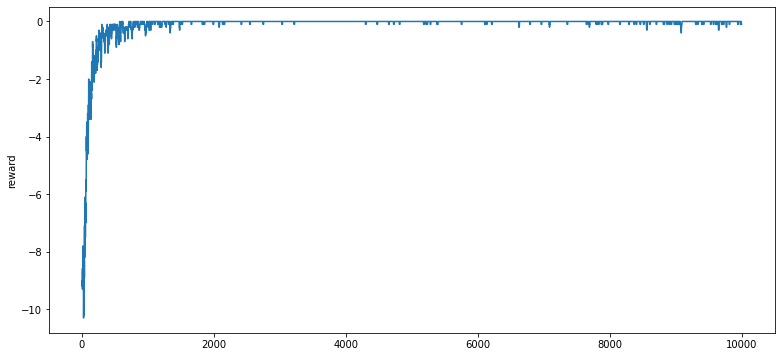

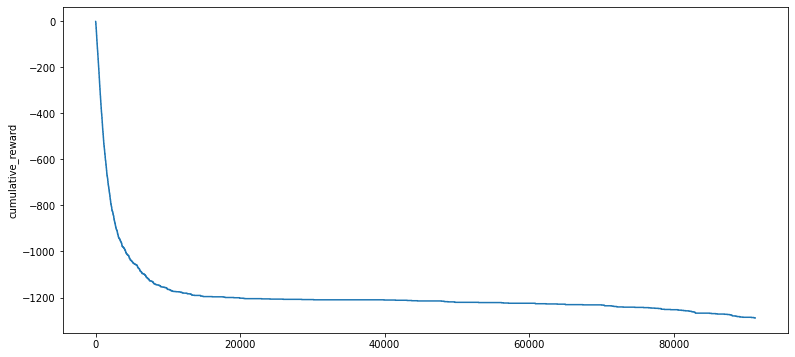

In [13]:
# Multi run results
#path = "../active/outputs/test/other_clockwiseTwoFree"
#path = "../active/outputs/test/other_clockwiseTwoFreeAlt"
#path = "../active/outputs/test/other_clockwiseZeroStart"
#path = "../active/outputs/test/other_1_1_shape_4m"
path = "../active/outputs/test/other_1_2_shape_4m"

fig = plt.figure(constrained_layout=False,figsize=(13,6))
for i in np.arange(0,1):
    run_path = path + "/"+str(i)+"/episode_data.csv"
    episode_results = pd.read_csv(run_path,index_col=0)
    sns.lineplot(data=episode_results,x=episode_results.index, y = episode_results.rolling(10).mean().reward)
fig2= plt.figure(constrained_layout=False,figsize=(13,6))
for i in np.arange(0,1):
    run_path = path + "/"+str(i)+"/move_data.csv"
    results = pd.read_csv(run_path,index_col=0)
    results["cumulative_reward"] = results.reward.cumsum()
    sns.lineplot(data=results,x=results.index, y = "cumulative_reward")

In [ ]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [ ]:
study_name = "naive_n8_Rule_001_8reps"
storage_name = "sqlite:///../active/outputs/tuning/{}.db".format(study_name)
study = optuna.study.load_study(study_name=study_name,storage=storage_name)

In [ ]:
study.best_params

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_contour(study)

In [ ]:
#import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split


In [ ]:
plot_param_importances(study)

In [ ]:
#print(np.ravel_multi_index((o_row,o_col,b_index),(6,6,4)))
print(np.unravel_index(72, (6,6,4)))

In [16]:
path_2 = "/Users/eric/repos/gohr/active/outputs/rule_runs/initial_run_n2"
path_4 = "/Users/eric/repos/gohr/active/outputs/rule_runs/initial_run_n4"
path_6 = "/Users/eric/repos/gohr/active/outputs/rule_runs/initial_run_n6"
path_8 = "/Users/eric/repos/gohr/active/outputs/rule_runs/initial_run_n8"
results =[{"path":path_2,"df":None,"steps":2},
            {"path":path_4,"df":None,"steps":4},
            {"path":path_6,"df":None,"steps":6},
            {"path":path_8,"df":None,"steps":8}]
rules = [name for name in os.listdir(path_2) if name!=".DS_Store"]

for j in range(0,len(results)):
    path = results[j]["path"]
    results_list = []
    for rule in rules:
        rule_path = path+"/"+rule
        rule_name = rule[6:]
        #print(rule_name)
        #print(run_path)
        for i in np.arange(0,8):
            trial_path = rule_path + "/"+str(i)+"/episode_data.csv"
            #print(trial_path)
            episode_results = pd.read_csv(trial_path,index_col=0)
            episode_results["rule"]=rule_name
            episode_results["trial"]=i
            episode_results["ep_error"]=-1*episode_results["reward"]
            episode_results["cumulative_error"] = episode_results.ep_error.cumsum()
            results_list.append(episode_results)
    results_df = pd.concat(results_list,ignore_index=True)
    results[j]["df"]=results_df

In [17]:
rules = [name for name in os.listdir(path) if name!=".DS_Store"]
print(rules)
count_steps = len(results)

complete_list = results_df.rule.unique()
rules_list = [{"name":"all_rules","rules":complete_list,"y":[0,3000]},
                {"name":"shape_rules","rules":["1_1_shape_4m","1_2_shape_4m", "1_1_shape_3m_cua"],"y":[0,3000]}, 
                {"name":"clockwise_rules","rules":["clockwiseZeroStart","clockwiseTwoFree","clockwiseTwoFreeAlt"],"y":[0,1000]},
                {"name":"quadrant_rules","rules":["quadrantNearby","quadrantNearbyTwoFree"],"y":[0,400]},
                {"name":"color_rules","rules":["1_1_color_4m","1_2_color_4m","1_1_color_3m_cua"],"y":[0,3000]},
                {"name":"bottom_top_rules","rules":["bottom_then_top","bottomLeft_then_topRight"],"y":[0,500]}]


['other_1_1_color_3m_cua', 'other_clockwiseZeroStart', 'other_1_1_shape_3m_cua', 'other_1_1_color_4m', 'other_clockwiseTwoFreeAlt', 'other_1_2_shape_4m', 'other_quadrantNearbyTwoFree', 'other_clockwiseTwoFree', 'other_bottomLeft_then_topRight', 'other_1_1_shape_4m', 'other_bottom_then_top', 'other_quadrantNearby', 'other_1_2_color_4m']


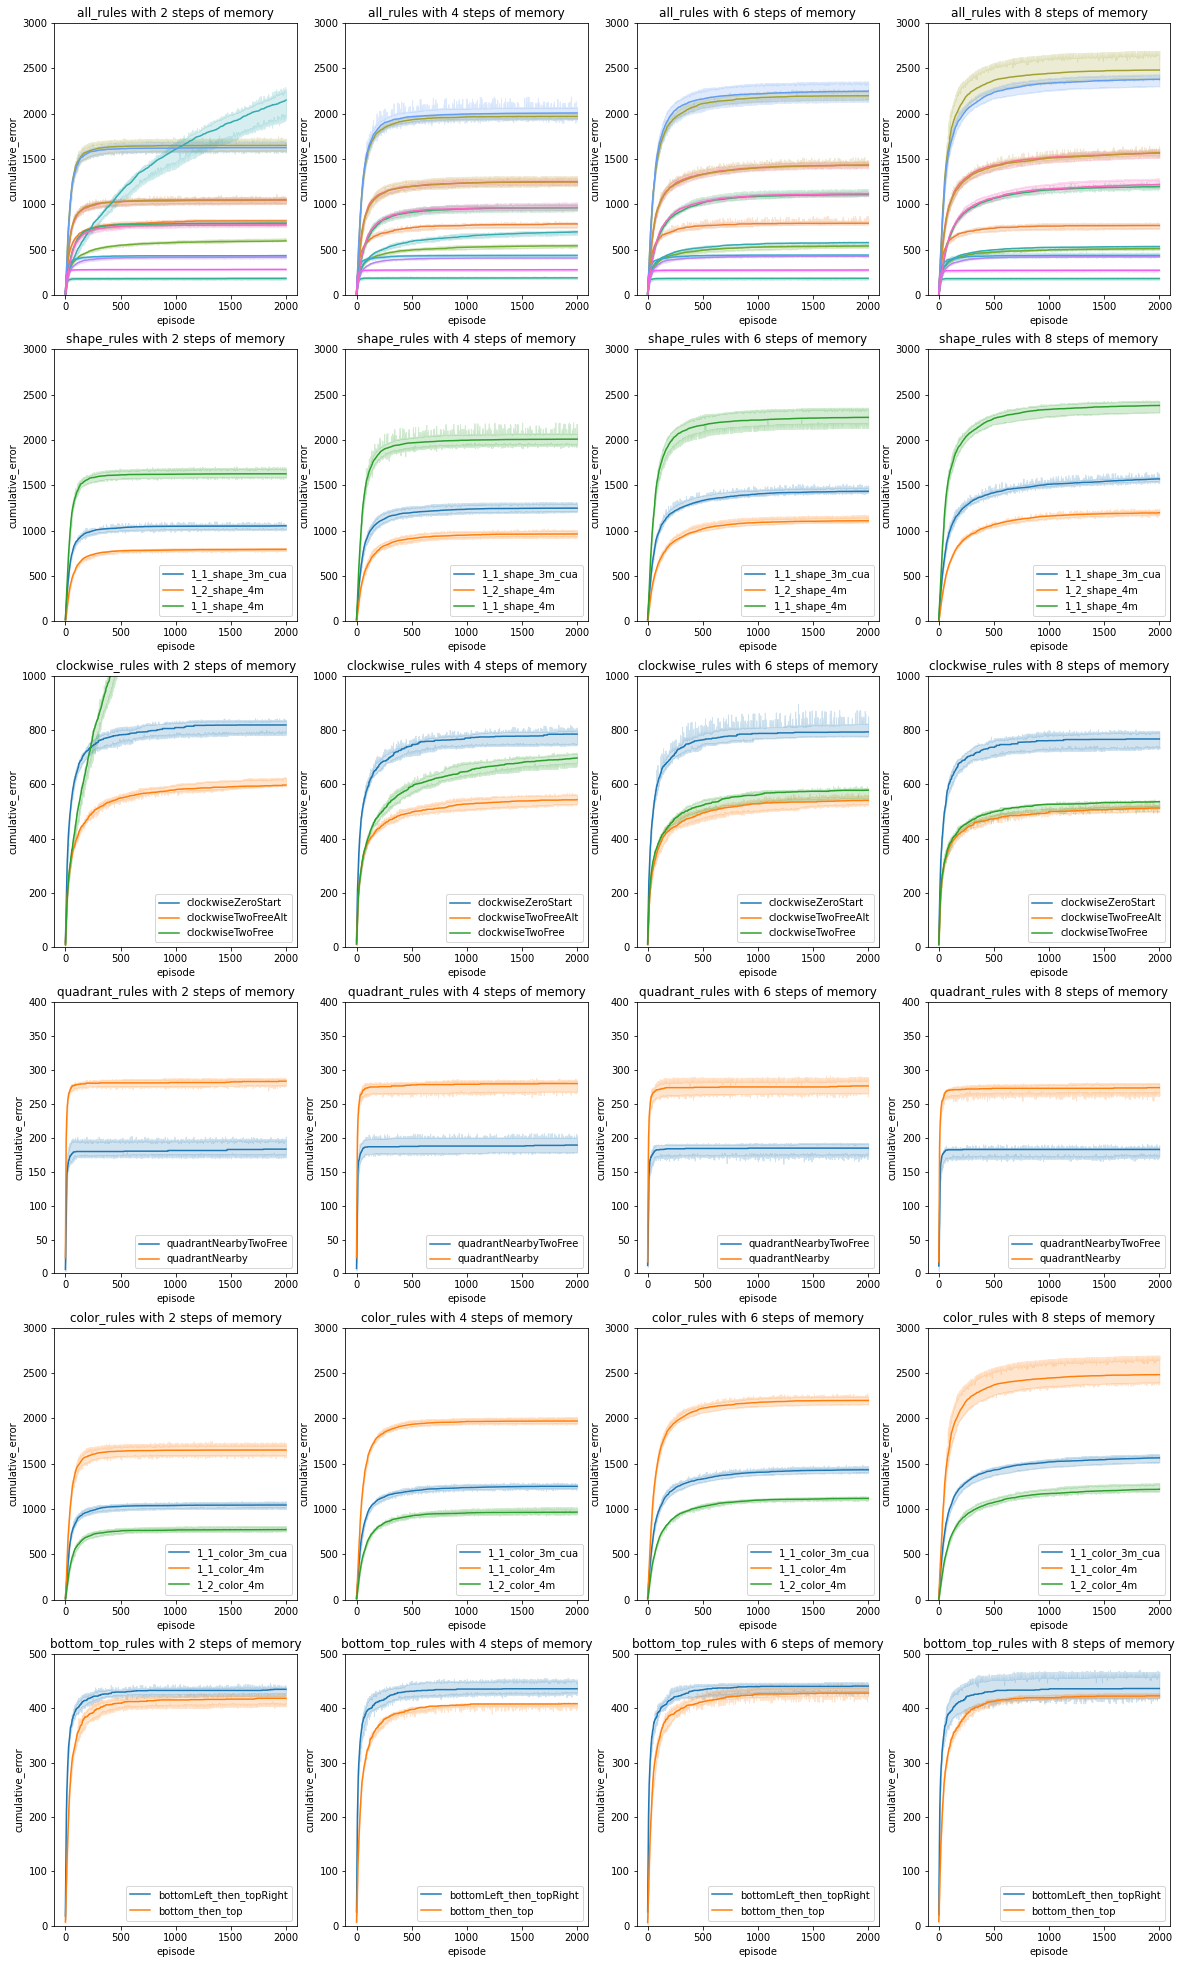

In [5]:

fig = plt.figure(figsize=(20,35))
gs = GridSpec(nrows = len(rules_list),ncols=count_steps)

for j in range(0,len(results)):
    results_df = results[j]["df"]
    step = results[j]["steps"]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        ax = fig.add_subplot(gs[i,j])
        ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode",ci=95,estimator=np.median,n_boot=100,hue="rule")
        ax.set_title(name+" with {} steps of memory".format(str(step)))
        ax.set_ylim(sub_dict["y"])
        if i>0:
            ax.legend(loc="lower right")
        else:
            ax.legend('',frameon=False)

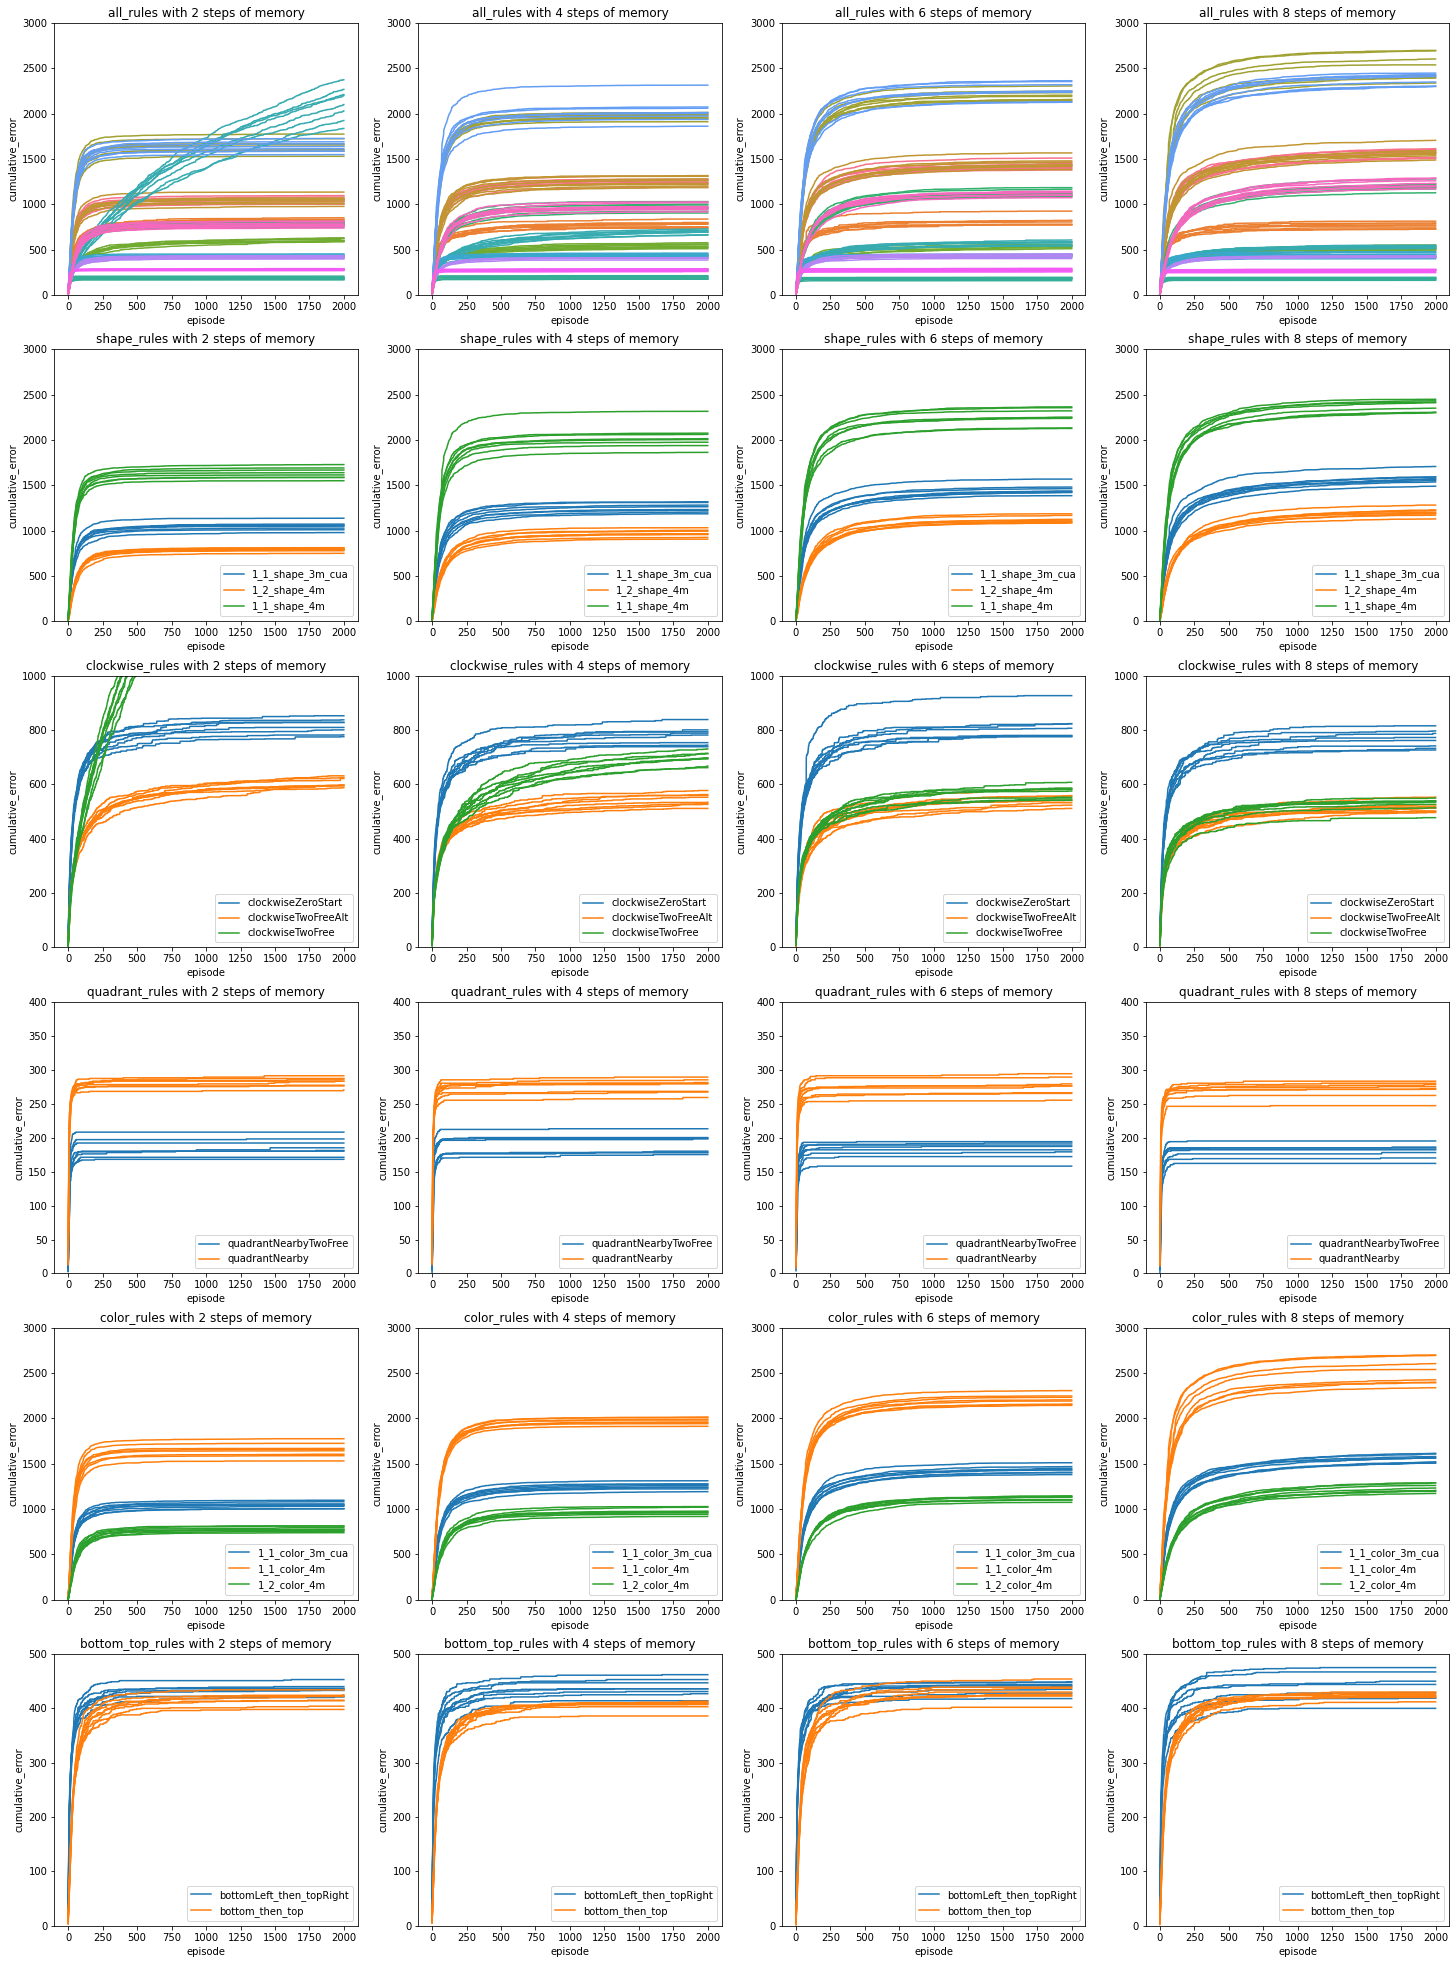

In [21]:
fig = plt.figure(figsize=(25,35))
gs = GridSpec(nrows = len(rules_list),ncols=count_steps)

for j in range(0,len(results)):
    results_df = results[j]["df"]
    step = results[j]["steps"]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        ax = fig.add_subplot(gs[i,j])
        ax=sns.lineplot(data=results_df.query("rule in @sub_list"),y="cumulative_error",x="episode",units="trial",estimator=None,hue="rule")
        ax.set_title(name+" with {} steps of memory".format(str(step)))
        ax.set_ylim(sub_dict["y"])
        if i>0:
            ax.legend(loc="lower right")
        else:
            ax.legend('',frameon=False)
